In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [ ]:
class_name = 'Occupancy'

dataset_path="/content/drive/Shared drives/DM2/files/temporal_splits/split_df_30min_Light.csv"
df = pd.read_csv(dataset_path)

df.head()
#del df['Temperature']
#del df['Humidity']
#del df['Light']
#del df['CO2']
#del df['HumidityRatio']


#df.loc[df["Occupancy"] == 1, "Occupancy"] = 'Yes'
#df.loc[df["Occupancy"] == 0, "Occupancy"] = 'No'


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,TimeSlot,Weekend,WorkingHour,Occupancy
0,6.541935,6.480189,6.421270,6.374135,6.374135,6.289292,6.279864,6.317573,6.374135,6.458978,6.374135,6.698424,6.998203,7.030255,6.942112,6.700938,6.867482,6.724820,6.920901,6.906761,6.763336,6.603525,6.826631,6.817204,6.727648,6.748073,6.554819,6.557961,6.458978,6.433839,2,0,1,1
1,6.526314,6.374135,6.472176,6.430697,6.279864,6.279864,6.279864,6.279864,6.195021,6.138459,6.187951,6.286935,6.296833,6.257240,6.257240,6.286935,6.286935,6.312859,6.374135,6.374135,6.374135,6.444837,6.484116,6.444837,6.409486,6.397702,6.374135,6.402416,6.409486,6.397702,2,0,1,1
2,6.327000,6.374135,6.430697,6.374135,6.374135,6.232729,6.374135,6.358423,6.421270,6.421270,6.421270,6.374135,6.303432,6.308146,6.244513,6.204448,6.257240,6.286935,6.223302,6.185594,6.185594,6.185594,6.185594,6.185594,6.185594,6.185594,6.185594,6.100751,6.072470,6.044189,2,0,1,1
3,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.044189,6.072470,6.079540,6.138459,6.044189,6.079540,6.079540,6.114892,6.129032,6.185594,6.104791,6.091324,6.072470,6.129032,6.138459,6.072470,2,0,1,1
4,6.079540,6.091324,6.185594,6.185594,6.162027,6.185594,6.185594,6.157313,6.129032,6.157313,6.150243,6.138459,6.129032,6.138459,6.079540,6.072470,6.044189,6.044189,6.044189,6.086611,6.112064,6.171454,6.179938,6.129032,6.171454,6.146001,6.146001,6.105465,6.060686,6.153542,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,0,0,0
679,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,0,0,0
680,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1,0,1,0
681,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.087985,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,2.131978,1,0,1,0


In [ ]:
X = df.iloc[:, 0:30].values
print(X)

#y = df.iloc[:, 61].values
y = df['Occupancy'].values
print(y)

[[6.54193548 6.48018854 6.4212697  ... 6.55796141 6.45897776 6.43383905]
 [6.52631357 6.37413463 6.47217558 ... 6.40241567 6.40948593 6.39770217]
 [6.32699956 6.37413463 6.43069672 ... 6.10075122 6.07247017 6.04418913]
 ...
 [2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.         ... 2.1319782  2.1319782  2.1319782 ]
 [2.1319782  2.1319782  2.1319782  ... 2.08798547 2.12726469 2.19482496]]
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

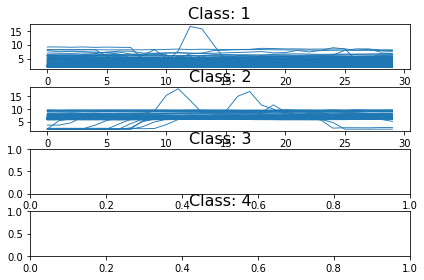

In [ ]:
plt.figure()
for i, classe in enumerate([1,2,3,4]):
    plt.subplot(4, 1, i +1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

# Data Normalization

In [ ]:
!pip install tslearn
!pip install tensorflow==1.15.0.
from keras.optimizers import Adagrad
from keras.optimizers import Adam
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [ ]:
#scaler = TimeSeriesScalerMinMax()
#X = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])

/usr/local/lib/python3.6/dist-packages/tslearn/preprocessing.py:179: RuntimeWarning: invalid value encountered in true_divide
  X_ = nomin / range_t + self.value_range[0]


# Data Partitioning

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
print(X_train)

[[3.7817057  3.72514361 3.23493887 ... 2.44306967 2.5279128  2.48077773]
 [2.76987283 3.06289586 5.15176511 ... 6.60980999 6.60980999 6.56267492]
 [2.         2.         2.         ... 2.         2.         2.        ]
 ...
 [2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.         ... 2.         2.         2.        ]]


# Shaplet Classifier

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 478
ts_sz 30
n_classes 2
shapelet_sizes {3: 4}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
from keras import optimizers
b = optimizers.adam(learning_rate=0.001)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer=b,
                        weight_regularizer=.01,
                        max_iter=1000,
                        verbose=1)

In [ ]:
shp_clf.fit(X_train, y_train)

Epoch 1/1000
478/478 [==============================] - 0s 862us/step - loss: 12.4040 - binary_accuracy: 0.0167 - binary_crossentropy: 12.3860
Epoch 2/1000
478/478 [==============================] - 0s 24us/step - loss: 12.3002 - binary_accuracy: 0.0167 - binary_crossentropy: 12.2822
Epoch 3/1000
478/478 [==============================] - 0s 27us/step - loss: 12.1833 - binary_accuracy: 0.0167 - binary_crossentropy: 12.1653
Epoch 4/1000
478/478 [==============================] - 0s 26us/step - loss: 12.0616 - binary_accuracy: 0.0167 - binary_crossentropy: 12.0438
Epoch 5/1000
478/478 [==============================] - 0s 27us/step - loss: 11.9401 - binary_accuracy: 0.0167 - binary_crossentropy: 11.9223
Epoch 6/1000
478/478 [==============================] - 0s 26us/step - loss: 11.8169 - binary_accuracy: 0.0167 - binary_crossentropy: 11.7991
Epoch 7/1000
478/478 [==============================] - 0s 25us/step - loss: 11.6919 - binary_accuracy: 0.0167 - binary_crossentropy: 11.6742
Epoch

ShapeletModel(batch_size=256, max_iter=1000, n_shapelets_per_size={3: 4},
              optimizer=<keras.optimizers.Adam object at 0x7f470d8c9be0>,
              random_state=None, shapelet_length=0.15, total_lengths=3,
              verbose=1, verbose_level=None, weight_regularizer=0.01)

In [ ]:
y_pred = shp_clf.predict(X_test)

205/205 [==============================] - 1s 4ms/step


In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9804878048780488
F1-score [0.98726115 0.95833333]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       159
           1       0.92      1.00      0.96        46

    accuracy                           0.98       205
   macro avg       0.96      0.99      0.97       205
weighted avg       0.98      0.98      0.98       205



# Shaplet-distances-based Classifier

In [ ]:
X_train2 = shp_clf.transform(X_train)

478/478 [==============================] - 1s 1ms/step


In [ ]:
X_train2.shape

(478, 4)

In [ ]:
X_train2

array([[6.2089591e+00, 1.0795593e-03, 2.0676550e+01, 5.4840088e-02],
       [2.5431316e-03, 2.7021091e+00, 2.5088603e+00, 1.0987244e+00],
       [2.1622417e+01, 1.6616821e-01, 4.5131577e+01, 3.1348090e+00],
       ...,
       [2.1622417e+01, 1.6616821e-01, 4.5131577e+01, 3.1348090e+00],
       [2.1622417e+01, 1.6616821e-01, 4.5131577e+01, 3.1348090e+00],
       [2.1622417e+01, 1.6616821e-01, 4.5131577e+01, 3.1348090e+00]],
      dtype=float32)

In [ ]:
X_test2 = shp_clf.transform(X_test)

205/205 [==============================] - 0s 26us/step


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=26, weights='uniform')
clf.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

In [ ]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9658536585365853
F1-score [0.97832817 0.91954023]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       159
           1       0.98      0.87      0.92        46

    accuracy                           0.97       205
   macro avg       0.97      0.93      0.95       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9560975609756097
F1-score [0.97213622 0.89655172]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       159
           1       0.95      0.85      0.90        46

    accuracy                           0.96       205
   macro avg       0.95      0.92      0.93       205
weighted avg       0.96      0.96      0.96       205



# Feature-based Classifier

In [ ]:
import scipy.stats as stats

In [ ]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
!pip install tsfresh
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

     |████████████████████████████████| 81kB 3.4MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=f2d4517924da771776405cabc67e75b1325426759d1eb9c9b5be8968009187f3
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train3 = np.array([list(calculate_features(x).values()) for x in X_train])

temp = pd.DataFrame(X_train3)
print (temp) 

impute(temp)
features_filtered = select_features(temp, y_train)

print (features_filtered)
features_filtered.to_numpy()

X_train3 = features_filtered.to_numpy()
X_train3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


           0         1         2   ...         10        11        12
0    2.959262  0.657358  0.432119  ...   4.501753  0.949447 -0.297728
1    6.302468  0.986737  0.973650  ...   6.387181 -2.628226  6.531552
2    2.000000  0.000000  0.000000  ...        inf  0.000000 -3.000000
3    2.000000  0.000000  0.000000  ...        inf  0.000000 -3.000000
4    2.000000  0.000000  0.000000  ...        inf  0.000000 -3.000000
..        ...       ...       ...  ...        ...       ...       ...
473  2.000000  0.000000  0.000000  ...        inf  0.000000 -3.000000
474  2.779771  0.184962  0.034211  ...  15.028887  0.795419  0.331576
475  2.000000  0.000000  0.000000  ...        inf  0.000000 -3.000000
476  2.000000  0.000000  0.000000  ...        inf  0.000000 -3.000000
477  2.000000  0.000000  0.000000  ...        inf  0.000000 -3.000000

[478 rows x 13 columns]
           5         3         6   ...        2         9            10
0    2.446605  2.532626  2.532626  ...  0.432119  1.045809     

array([[2.44660480e+00, 2.53262631e+00, 2.53262631e+00, ...,
        4.32118951e-01, 1.04580940e+00, 4.50175333e+00],
       [6.33171307e+00, 6.47193990e+00, 6.47193990e+00, ...,
        9.73649949e-01, 3.59797712e-01, 6.38718142e+00],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03],
       ...,
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03]])

In [ ]:
X_train3.shape

(478, 12)

In [ ]:
X_train3

array([[2.44660480e+00, 2.53262631e+00, 2.53262631e+00, ...,
        4.32118951e-01, 1.04580940e+00, 4.50175333e+00],
       [6.33171307e+00, 6.47193990e+00, 6.47193990e+00, ...,
        9.73649949e-01, 3.59797712e-01, 6.38718142e+00],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03],
       ...,
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.02669294e+03]])

In [ ]:
X_test3 = np.array([list(calculate_features(x).values()) for x in X_test])

temp = pd.DataFrame(X_test3)
print (temp) 

impute(temp)
features_filtered = select_features(temp, y_test)

print (features_filtered)
features_filtered.to_numpy()

X_test3 = features_filtered.to_numpy()
X_test3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


           0         1         2   ...          10        11        12
0    2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000
1    2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000
2    2.608985  1.402607  1.967305  ...    1.860097  1.960577  1.981588
3    2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000
4    6.102558  0.041543  0.001726  ...  146.897020  0.363027 -0.994693
..        ...       ...       ...  ...         ...       ...       ...
200  2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000
201  2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000
202  2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000
203  2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000
204  2.000000  0.000000  0.000000  ...         inf  0.000000 -3.000000

[205 rows x 13 columns]
           5         3         6   ...        2         9             10
0    2.000000  2.000000  2.000000  ...  0.000000  

array([[2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.42380374e+15],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.42380374e+15],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        1.96730549e+00, 0.00000000e+00, 1.86009746e+00],
       ...,
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.42380374e+15],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.42380374e+15],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.42380374e+15]])

In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train3, y_train)

y_pred = clf.predict(X_test3)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9804878048780488
F1-score [0.98742138 0.95652174]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.96      0.96      0.96        46

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



# Time Series Classifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.975609756097561
F1-score [0.98412698 0.94736842]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.92      0.98      0.95        46

    accuracy                           0.98       205
   macro avg       0.96      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205



In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9902439024390244
F1-score [0.99367089 0.9787234 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       159
           1       0.96      1.00      0.98        46

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
!pip install pyts
from pyts.classification import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9658536585365853
F1-score [0.97805643 0.92307692]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       159
           1       0.93      0.91      0.92        46

    accuracy                           0.97       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.97      0.97      0.97       205



# CNN Classifier

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization

In [ ]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  30
N. LABELS:  2


In [ ]:
cnn = build_simple_cnn(n_timesteps, n_outputs)

In [ ]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 23, 16)            144       
_________________________________________________________________
batch_normalization_10 (Batc (None, 23, 16)            64        
_________________________________________________________________
activation_10 (Activation)   (None, 23, 16)            0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 23, 16)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 19, 32)            2592      
_________________________________________________________________
batch_normalization_11 (Batc (None, 19, 32)            128       
_________________________________________________________________
activation_11 (Activation)   (None, 19, 32)           

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

In [ ]:
history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Train on 382 samples, validate on 96 samples
Epoch 1/5
382/382 [==============================] - 0s 555us/step - loss: 0.0631 - accuracy: 0.9738 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 2/5
382/382 [==============================] - 0s 546us/step - loss: 0.0433 - accuracy: 0.9817 - val_loss: 0.1124 - val_accuracy: 0.9167
Epoch 3/5
382/382 [==============================] - 0s 528us/step - loss: 0.0746 - accuracy: 0.9712 - val_loss: 0.3230 - val_accuracy: 0.9688
Epoch 4/5
382/382 [==============================] - 0s 534us/step - loss: 0.0644 - accuracy: 0.9791 - val_loss: 0.0805 - val_accuracy: 1.0000
Epoch 5/5
382/382 [==============================] - 0s 551us/step - loss: 0.0622 - accuracy: 0.9817 - val_loss: 0.0949 - val_accuracy: 0.9792


In [ ]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9707317073170731
F1-score [0.98136646 0.93181818]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       159
           1       0.98      0.89      0.93        46

    accuracy                           0.97       205
   macro avg       0.97      0.94      0.96       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
print (cnn.metrics_names)
cnn.evaluate(X_test_cnn, y_test)

['loss', 'accuracy']
205/205 [==============================] - 0s 158us/step


[0.42281345594220043, 0.9512194991111755]

# LSTM Classifier

In [ ]:
from keras.layers import LSTM

In [ ]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(8, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
lstm = build_lstm(n_timesteps, n_outputs)

In [ ]:
lstm.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dropout_106 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_105 (Dense)            (None, 2)                 18        
_________________________________________________________________
dropout_107 (Dropout)        (None, 2)                 0         
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 6         
Total params: 344
Trainable params: 344
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=mini_batch_size*4, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Train on 382 samples, validate on 96 samples
Epoch 1/30
382/382 [==============================] - 0s 304us/step - loss: 0.0071 - accuracy: 0.9921 - val_loss: 6.1509e-04 - val_accuracy: 1.0000
Epoch 2/30
382/382 [==============================] - 0s 291us/step - loss: 0.0118 - accuracy: 0.9974 - val_loss: 3.9415e-04 - val_accuracy: 1.0000
Epoch 3/30
382/382 [==============================] - 0s 339us/step - loss: 0.0047 - accuracy: 0.9974 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/30
382/382 [==============================] - 0s 285us/step - loss: 0.0147 - accuracy: 0.9921 - val_loss: 2.6898e-04 - val_accuracy: 1.0000
Epoch 5/30
382/382 [==============================] - 0s 276us/step - loss: 0.0083 - accuracy: 0.9921 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/30
382/382 [==============================] - 0s 283us/step - loss: 0.0172 - accuracy: 0.9974 - val_loss: 0.0139 - val_accuracy: 0.9896
Epoch 7/30
382/382 [==============================] - 0s 287us/step - loss: 0.0

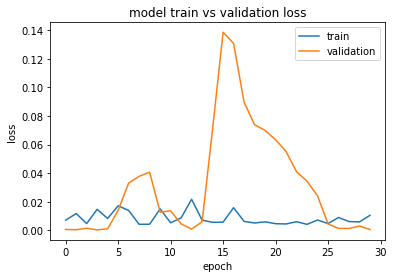

In [ ]:
from matplotlib import pyplot
pyplot.plot(history_lstm['loss'])
pyplot.plot(history_lstm['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.775609756097561
F1-score [0.87362637 0.        ]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       159
           1       0.00      0.00      0.00        46

    accuracy                           0.78       205
   macro avg       0.39      0.50      0.44       205
weighted avg       0.60      0.78      0.68       205



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
